<a href="https://colab.research.google.com/github/askolesov0608/CV_NV/blob/main/99CVLab5_Tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and setup

In [99]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
from google.colab import files

In [101]:
!cp /content/gdrive/MyDrive/CV/Lab5/visualPercepUtils.py /content #copy file

In [102]:
!cp -r /content/gdrive/MyDrive/CV/Lab5/ /content #copy all folder

In [103]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import filters
from skimage.filters import threshold_otsu
import glob
import sys
import os

from skimage import measure
from skimage import feature
from skimage.transform import hough_line, hough_line_peaks  # , probabilistic_hough_line
from skimage.morphology import disk, square, closing, opening # for the mathematically morphology part


from scipy import ndimage as ndi
from copy import deepcopy

import glob # Модуль для поиска файлов в директориях с помощью шаблонов в Unix стиле. Например, glob.glob('*.png')
import visualPercepUtils as vpu






In [104]:
#files.upload()

# Code provided from the teacher

## Inputs

In [105]:
#пути к директориям для входных и выходных файлов.
path_input = './Lab5/imgs-P5/'
path_output = './Lab5/imgs-out-P5/'

In [106]:
ls

gdrive/  Lab5/  __pycache__/  sample_data/  visualPercepUtils.py


In [107]:
# Получаем список файлов в директории
files = os.listdir(path_input)

# Выводим список файлов
for file in files:
    print(file)

monedas2.pgm
monedas.pgm
monedas1.pgm


## Def functions

In [108]:
bStudentVersion=True
if not bStudentVersion:
    import p5e

In [109]:
def testOtsu(im, params=None):
    nbins = 256
    th = threshold_otsu(im)
    hist = np.histogram(im.flatten(), bins=nbins, range=[0, 255])[0]
    return [th, im > th, hist]  # threshold, binarized image (using such threshold), and image histogram


In [110]:
def fillGaps(im, params=None):
    binIm = im > threshold_otsu(im)
    sElem = disk(params['closing-radius'])
    return [binIm, closing(binIm, sElem)]

In [111]:
# Don't worry about this function
def removeSmallRegions(im, params=None):
    binIm = im > threshold_otsu(im)
    sElem = disk(params['opening-radius'])
    return [binIm, opening(binIm, sElem)]

In [112]:
# Don't worry about this function
def fillGapsThenRemoveSmallRegions(im, params=None):
    binIm, closeIm = fillGaps(im, params)  # first, fill gaps
    sElem = disk(params['opening-radius'])
    return [binIm, opening(closeIm, sElem)]

In [113]:
def labelConnectedComponents(im, params=None):
    binIm = im > threshold_otsu(im, params)
    binImProc = fillGapsThenRemoveSmallRegions(im, params)[1]
    return [binIm, binImProc,
            measure.label(binIm, background=0), measure.label(binImProc, background=0)]


In [114]:
def reportPropertiesRegions(labelIm,title):
    print("* * "+title)
    regions = measure.regionprops(labelIm)
    for r, region in enumerate(regions):  # enumerate() is often handy: it provides both the index and the element
        print("Region", r + 1, "(label", str(region.label) + ")")
        print("\t area: ", region.area)
        print("\t perimeter: ", round(region.perimeter, 1))  # show only one decimal place


Test image files

In [115]:
# -----------------
# Test image files
# -----------------
path_input = './Lab5/imgs-P5/'
path_output = './Lab5/imgs-out-P5/'
bAllFiles = False
if bAllFiles:
    files = glob.glob(path_input + "*.p??")
else:
    files = [path_input + 'monedas.pgm']

Tests to perform

In [116]:
# --------------------
# Tests to perform
# --------------------
bAllTests = True
if bAllTests:
    tests = ['testOtsu', 'labelConnectedComponents']
else:
    tests = ['fillGaps']
    tests = ['labelConnectedComponents']

Dictionary of user-friendly names for each function ("test") name

In [117]:
nameTests = {'testOtsu': "thresholding with Otsu's method",
             'labelConnectedComponents': 'Labelling conected components'}

myThresh = 180  # use your own value here
diskSizeForClosing = 2  # don't worry about this
diskSizeForOpening = 5  # don't worry about this

## To do tests

Testing  ['testOtsu', 'labelConnectedComponents'] on ['./Lab5/imgs-P5/monedas.pgm']
./Lab5/imgs-P5/monedas.pgm testOtsu
3
4 2 2


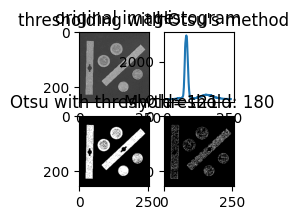

./Lab5/imgs-P5/monedas.pgm labelConnectedComponents
4
5 2 2


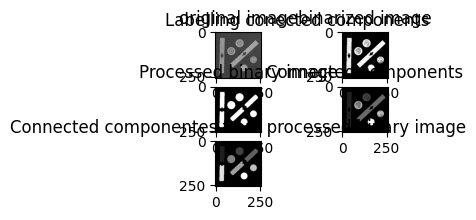

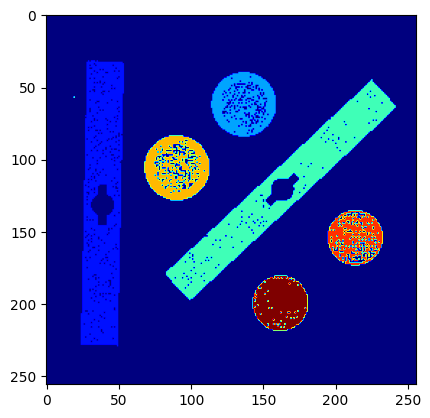

* * From unprocessed binary image
Region 1 (label 1)
	 area:  4469
	 perimeter:  1376.0
Region 2 (label 2)
	 area:  1372
	 perimeter:  562.6
Region 3 (label 3)
	 area:  4676
	 perimeter:  919.5
Region 4 (label 4)
	 area:  1
	 perimeter:  0.0
Region 5 (label 5)
	 area:  1309
	 perimeter:  601.1
Region 6 (label 6)
	 area:  891
	 perimeter:  497.5
Region 7 (label 7)
	 area:  1102
	 perimeter:  259.4
* * From filtered binary image
Region 1 (label 1)
	 area:  2279
	 perimeter:  239.5
Region 2 (label 2)
	 area:  1579
	 perimeter:  146.1
Region 3 (label 3)
	 area:  2171
	 perimeter:  221.5
Region 4 (label 4)
	 area:  1591
	 perimeter:  146.1
Region 5 (label 5)
	 area:  2268
	 perimeter:  234.8
Region 6 (label 6)
	 area:  1135
	 perimeter:  122.8
Region 7 (label 7)
	 area:  2224
	 perimeter:  230.8
Region 8 (label 8)
	 area:  1146
	 perimeter:  123.4


In [118]:
def doTests():
    print("Testing ", tests, "on", files)
    nFiles = len(files)
    nFig = None
    for i, imfile in enumerate(files):
        im_pil = Image.open(imfile).convert('L')
        im = np.array(im_pil)  # from Image to array

        for test in tests:
            title = nameTests[test]
            print(imfile, test)
            if test == "testOtsu":
                params = {}
            elif test == "labelConnectedComponents":
                params = {}
                params['closing-radius'] = diskSizeForClosing
                params['opening-radius'] = diskSizeForOpening
                subtitles = ["original image", "binarized image", "Processed binary image", "Connected components", "Connected componentes from processed binary image"]

            outs_np = eval(test)(im, params)

            if test == "testOtsu":
                outs_np_plot = [outs_np[2]] + [outs_np[1]] + [im > myThresh]
                subtitles = ["original image", "Histogram", "Otsu with threshold=" + str(outs_np[0]),
                             "My threshold: " + str(myThresh)]
                m = n = 2
            else:
                outs_np_plot = outs_np
            print(len(outs_np_plot))
            vpu.showInGrid([im] + outs_np_plot, m=m, n=n, title=title, subtitles=subtitles)
            if test == 'labelConnectedComponents':
                plt.figure()
                labelImOriginalBinaryImage = outs_np_plot[2]
                labelImProcessedBinaryImage = outs_np_plot[3]
                vpu.showImWithColorMap(labelImOriginalBinaryImage,'jet') # the default color map, 'spectral', does not work in lab computers
                plt.show(block=True)
                titleForBinaryImg = "From unprocessed binary image"
                titleForProcesImg = "From filtered binary image"
                reportPropertiesRegions(labelIm=labelImOriginalBinaryImage,title=titleForBinaryImg)
                reportPropertiesRegions(labelIm=labelImProcessedBinaryImage,title=titleForProcesImg)

                if not bStudentVersion:
                    p5e.displayImageWithCoins(im,labelIm=labelImOriginalBinaryImage,title=titleForBinaryImg)
                    p5e.displayImageWithCoins(im,labelIm=labelImProcessedBinaryImage,title=titleForProcesImg)

    plt.show(block=True)  # show pending plots


if __name__ == "__main__":
    doTests()


# Testing directory and loads

In [119]:
ls

gdrive/  Lab5/  __pycache__/  sample_data/  visualPercepUtils.py


In [120]:
folder_path = './Lab5/imgs-P5/'
path_output = './Lab5/imgs-out-P5/'


In [121]:
# Получаем список файлов в директории
files = os.listdir(folder_path)

# Выводим список файлов
for file in files:
    print(file)

monedas2.pgm
monedas.pgm
monedas1.pgm


In [122]:
filename = "monedas.pgm"

In [123]:
path_input = os.path.join(folder_path, filename)

In [124]:
test_image = Image.open(path_input)
print(test_image.size)

(256, 256)


array([[75, 79, 88, ..., 83, 85, 86],
       [76, 67, 70, ..., 79, 85, 79],
       [81, 79, 83, ..., 78, 77, 77],
       ...,
       [71, 72, 76, ..., 79, 77, 84],
       [78, 75, 66, ..., 67, 73, 76],
       [83, 86, 76, ..., 67, 72, 76]], dtype=uint8)
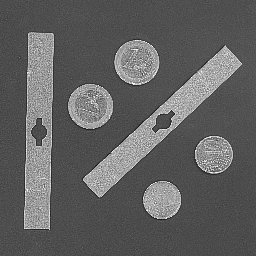

In [125]:
im = np.array(test_image.convert('L'))
im

# 1. Binarisation

- Which function do we use to apply Otsu method?  
-- from skimage.filters import threshold_otsu

## Test to plot Histograms

### Var 1

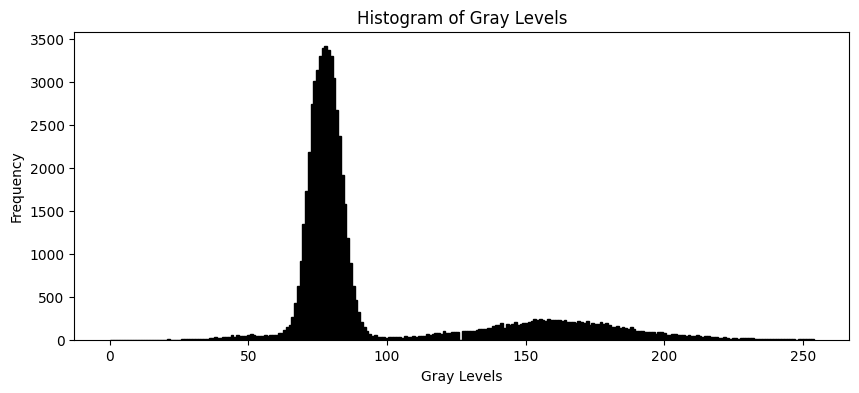

In [126]:
image_gray = im

# Вывод гистограммы уровней серого
plt.figure(figsize=(10, 4))
plt.hist(image_gray.ravel(), bins=256, range=(0.0, 254.0), fc='k', ec='k')
plt.title('Histogram of Gray Levels')
plt.xlabel('Gray Levels')
plt.ylabel('Frequency')

# Отображение гистограммы
plt.show()

Гистограмма уровней серого:
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    1    2    0    0    3    1    2    2    1    3    3
    5    5   13   13   10   13   13   14   20   23   27   17   23   33
   36   37   54   34   53   46   47   49   52   66   51   44   42   41
   52   48   57   59   60   80   76  109  151  173  265  424  626  921
 1342 1730 2187 2740 3004 3133 3301 3387 3411 3373 3295 3043 2674 2374
 1915 1579 1178  896  627  466  325  201  143  100   72   48   54   30
   35   30   20   31   29   28   26   37   23   43   37   30   42   32
   38   49   49   62   58   71   75   76   71   96   82   76   94   89
   87  104   96  102  106  107  112  129  120  125  142  139  154  169
  166  190  141  181  175  183  207  173  187  199  190  201  222  236
  233  240  226  221  236  233  232  224  226  218  227  211  209  211
  193  213  204  199  216  173  191  181  182  205  180  193  174  146
  152  162  133  143  139  123  143  123  101   9

<BarContainer object of 254 artists>

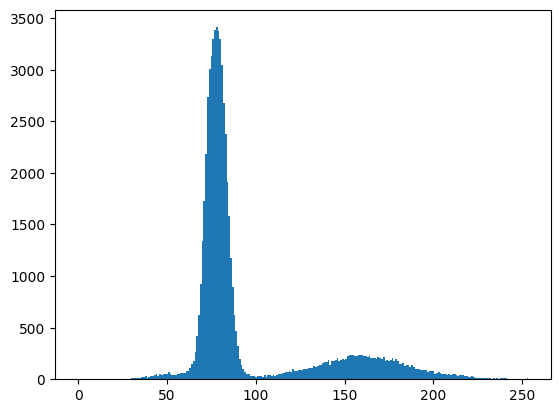

In [127]:
image_gray = im
# Расчет гистограммы
histogram, bin_edges = np.histogram(image_gray, bins=254, range=(0, 254))

histogram1 = np.histogram(image_gray, bins=254, range=(0, 254))


#bins=256: Определяет количество столбцов
#range=(0.0, 254.0): Задает диапазон значений гистограммы,
#fc='k', ec='k': Задает цвет заливки (fc, facecolor) и цвет края (ec, edgecolor) столбцов гистограммы на черный.

# Вывод гистограммы
print("Гистограмма уровней серого:")
print(histogram)

# Вывод границ бинов гистограммы
print("\nГраницы бинов:")
print(bin_edges)

plt.bar(bin_edges[:-1], histogram, width=1)


### Best way

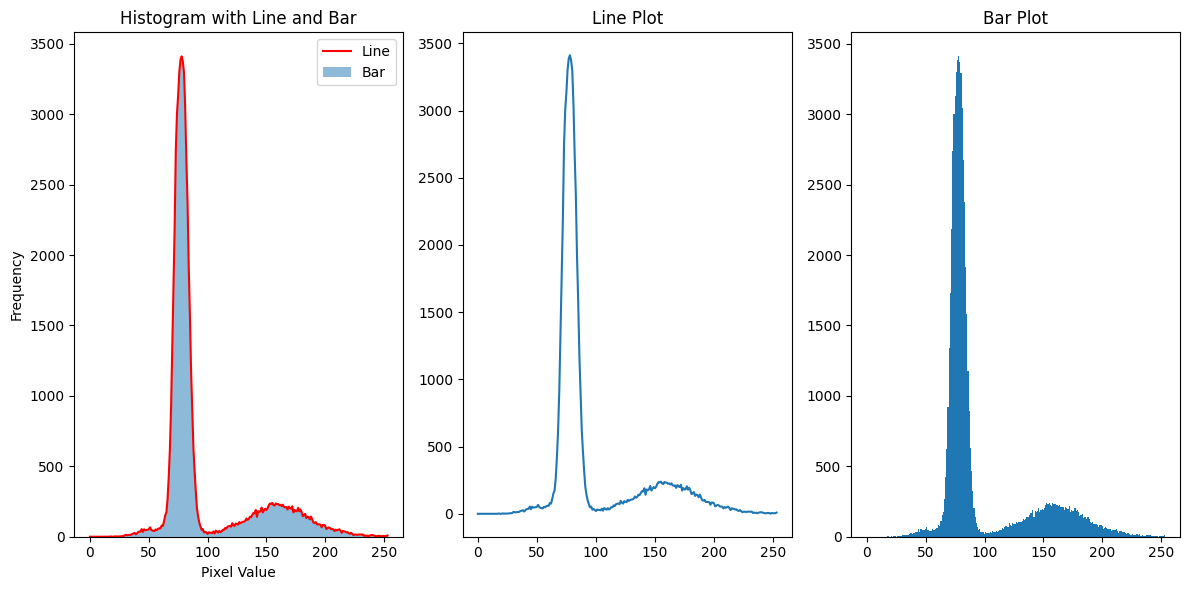

In [128]:
image_gray = im
# Расчет гистограммы

histogram1 = np.histogram(image_gray, bins=254, range=(0, 254))
#bins=256: Определяет количество столбцов
#range=(0.0, 254.0): Задает диапазон значений гистограммы,
#fc='k', ec='k': Задает цвет заливки (fc, facecolor) и цвет края (ec, edgecolor) столбцов гистограммы на черный.

# Вывод гистограммы
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

# График линии
axs[0].plot(histogram1[1][:-1], histogram1[0], color='red', label='Line')
# histogram1[1] содержит значения бинов (интервалы), по которым разбито изображение для построения гистограммы.
# [:-1] используется для выбора всех элементов массива кроме последнего
# histogram1[0] содержит частоты, соответствующие каждому бину.
# plt bar или plot-график(от какого до какого элемента массива бинов, указываем размеры бтнов сколько раз встретился содержить в щ части массива hist[0])

# График столбцов
axs[0].bar(histogram1[1][:-1], histogram1[0], width=1.0, alpha=0.5, label='Bar')


                                                    #plt.figure(figsize=(10, 5))
                                                    #plt.bar(bin_edges[:-1], histogram, width=1)
axs[0].set_title('Histogram with Line and Bar')     #plt.title('Histogram')
axs[0].set_xlabel('Pixel Value')                    #plt.xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')                      #plt.ylabel('Frequency')
axs[0].legend()
                                                   #plt.show()

# Второй график
axs[1].plot(histogram1[1][:-1], histogram1[0])
axs[1].set_title('Line Plot')

# Третий график
axs[2].bar(histogram1[1][:-1], histogram1[0], width=1.0)
axs[2].set_title('Bar Plot')

# Показать графики
plt.tight_layout()
plt.show()



### Testing plot positions in array/ Not using plt.xlim(vv, nn)

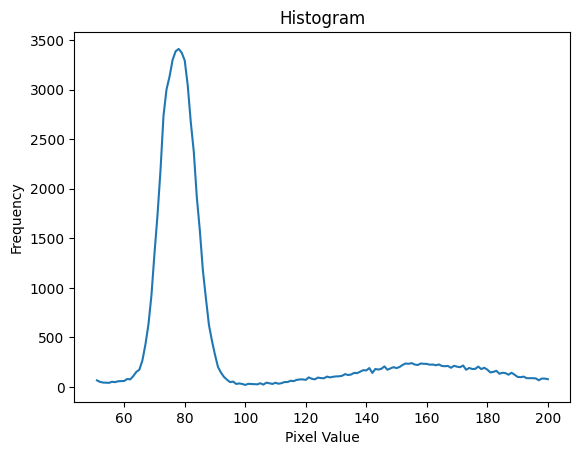

In [129]:
# Вывод графика гистограммы
plt.plot(histogram1[1][51:201], histogram1[0][51:201])
plt.title('Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

## Threshold otsu and manual

In [130]:
# Определение порога Оцу
thresh = threshold_otsu(image_gray)
thresh

121

In [131]:
# Ручной порог
myThreshold = 110  # на основе гистограммы

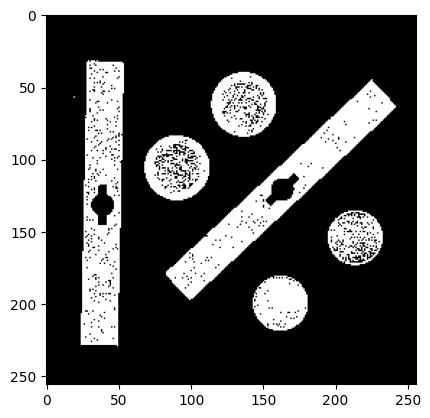

In [132]:
binary_auto = image_gray > thresh
plt.imshow(binary_auto)

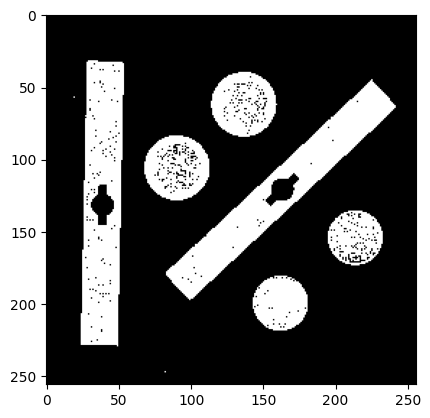

In [133]:
binary_manual = image_gray > myThreshold
plt.imshow(binary_manual)

# 2. Region labelling


Функция: Одной из популярных функций для маркировки связных компонентов является label из библиотеки skimage.measure.

Параметр background определяет, какое значение пикселей в бинаризованном изображении будет считаться фоном при маркировке связных компонентов. По умолчанию, background=0 предполагает, что фоновые пиксели равны 0, а объекты — 1.

Смена на background=1 означает, что теперь фоновые пиксели имеют значение 1, а объектные — 0. Это инвертирует логику маркировки, и компоненты, ранее считавшиеся фоном, теперь будут считаться объектами, и наоборот.

In [134]:
from skimage.measure import label
from skimage.morphology import binary_opening, binary_closing, disk

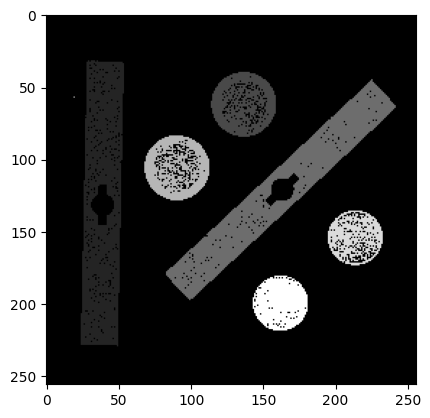

In [135]:
binary_image = binary_auto
labeled_image = label(binary_image, background=0)  # background=1 для инверсии
plt.imshow(labeled_image)

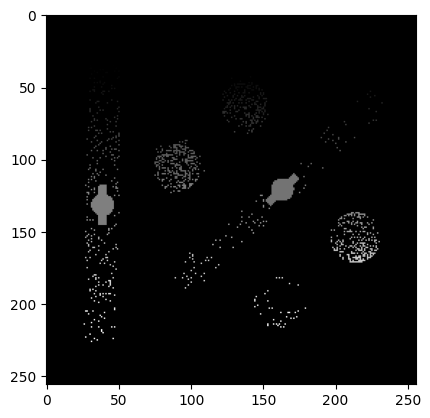

In [136]:
binary_image = binary_auto
labeled_image = label(binary_image, background=1)  #background=1 для инверсии
plt.imshow(labeled_image)

- selem = disk(1)
-- Эта функция из модуля skimage.morphology создает структуру в форме диска (круга) радиусом 1 пиксель.
-- Возвращаемый структурирующий элемент представляет собой бинарный массив, где элементы внутри радиуса установлены в True (или 1), а вне радиуса — в False (или 0).
-- [[0 1 0]  [1 1 1]  [0 1 0]]
-  (Dilation): При этой операции каждый пиксель изображения заменяется максимальным значением пикселей
- (Erosion): Каждый пиксель заменяется минимальным значением
- (Opening): Сочетание эрозии, за которой следует дилатация
- (Closing): Сочетание дилатации, за которой следует эрозия

In [137]:
selem = disk(1)
selem


array([[0, 1, 0],
       [1, 1, 1],
       [0, 1, 0]], dtype=uint8)

- Binary Opening — это морфологическая операция, которая сначала применяет эрозию к изображению, а затем дилатацию
- Opening (A)=(A⊖B)⊕B где
-- A — исходное изображение,
-- B — структурирующий элемент,
-- ⊖ обозначает эрозию, и
-- ⊕ обозначает дилатацию.

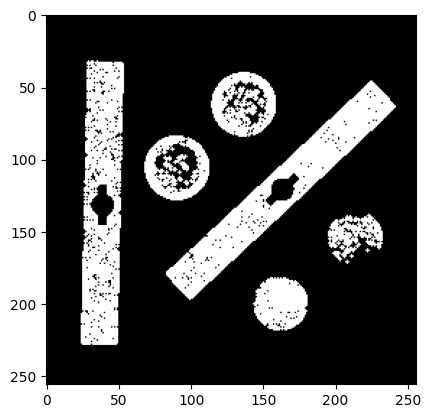

In [138]:
cleaned_image_bo = binary_opening(binary_image, selem)
plt.imshow(cleaned_image_bo)

- Binary Closing — это операция, которая сначала применяет дилатацию к изображению, а затем эрозию. Математически это выражается как:
Closing(A)=(A⊕B)⊖B где
-- A — исходное изображение,
-- B — структурирующий элемент,
-- ⊖ обозначает эрозию, и
-- ⊕ обозначает дилатацию.

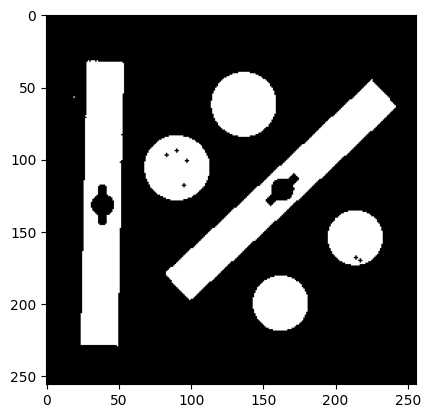

In [139]:
cleaned_image_bc = binary_closing(binary_image, selem)
plt.imshow(cleaned_image_bc)

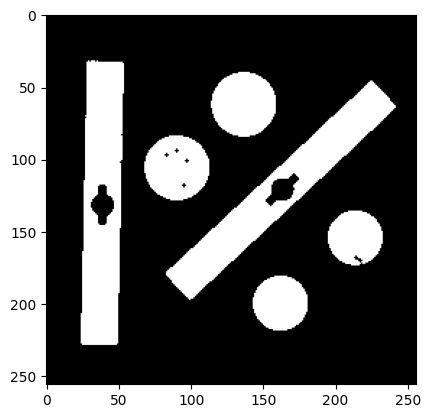

In [140]:
# Combine
cleaned_image_bc = binary_closing(binary_image, selem)
cleaned_image = binary_opening(cleaned_image_bc, selem)

plt.imshow(cleaned_image)


# Region characterisation

In [141]:
from skimage.measure import label, regionprops

In [142]:
# Маркировка областей
labeled_image = label(binary_image)

# Расчет характеристик для каждой области
for region in regionprops(labeled_image):
    print('Area:', region.area)
    print('Perimeter:', region.perimeter)
    print('Bounding box:', region.bbox)
    print('Eccentricity:', region.eccentricity)

Area: 4469
Perimeter: 1376.035713374682
Bounding box: (32, 24, 230, 54)
Eccentricity: 0.9914803404502356
Area: 1372
Perimeter: 562.564537881567
Bounding box: (40, 114, 85, 159)
Eccentricity: 0.17925533566570817
Area: 4676
Perimeter: 919.5159441150373
Bounding box: (45, 83, 198, 242)
Eccentricity: 0.9914072122300557
Area: 1
Perimeter: 0.0
Bounding box: (57, 19, 58, 20)
Eccentricity: 0
Area: 1309
Perimeter: 601.1147904132612
Bounding box: (84, 68, 129, 113)
Eccentricity: 0.17799277712996703
Area: 891
Perimeter: 497.5401512639275
Bounding box: (136, 195, 174, 233)
Eccentricity: 0.39883523235611007
Area: 1102
Perimeter: 259.3563850798539
Bounding box: (181, 143, 219, 181)
Eccentricity: 0.14641929030595074


In [143]:
from skimage import io, color, filters, measure, draw

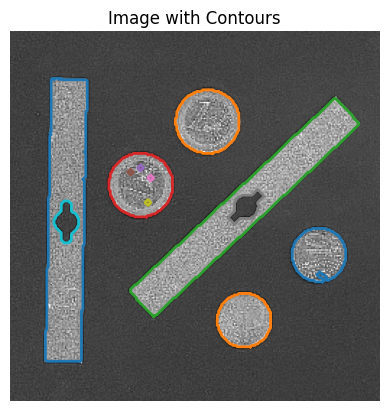

In [144]:
contours = measure.find_contours(cleaned_image, level=0.999)
# 0 и 1, где 1 соответствует белому цвету (объекты) и 0 черному (фон).

# Отображение исходного изображения
plt.imshow(image_gray, cmap='gray')

# Отображение контуров
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    #contour[:, 1]: Это выражение выбирает все значения во втором столбце каждого контура (координаты y),
    #которые в случае изображений соответствуют координатам по горизонтали (ось x на графике).
    #contour[:, 0]: Это выражение выбирает все значения в первом столбце каждого контура (координаты x),
    #которые соответствуют координатам по вертикали (ось y на графике).
    #--- NumPy и изображения в matplotlib используют разные системы координат

plt.title('Image with Contours')
plt.axis('off')  # Выключаем оси
plt.show()

# 4. Exercises

## 1  Exercis segmentation of the coin images

array([[79, 75, 71, ..., 82, 84, 87],
       [80, 78, 71, ..., 82, 78, 85],
       [73, 83, 81, ..., 80, 86, 81],
       ...,
       [86, 80, 79, ..., 77, 82, 72],
       [71, 78, 69, ..., 78, 67, 74],
       [81, 80, 85, ..., 76, 74, 80]], dtype=uint8)
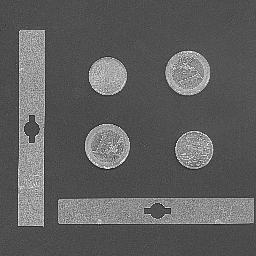

In [145]:
filename1 = "monedas1.pgm"
path_input = os.path.join(folder_path, filename1)
test_image1 = Image.open(path_input)
im1 = np.array(test_image1.convert('L'))
im1



array([[68, 83, 70, ..., 63, 82, 71],
       [60, 73, 68, ..., 70, 71, 64],
       [66, 67, 64, ..., 84, 66, 76],
       ...,
       [62, 74, 64, ..., 73, 70, 57],
       [63, 58, 63, ..., 75, 74, 54],
       [59, 86, 63, ..., 68, 63, 62]], dtype=uint8)
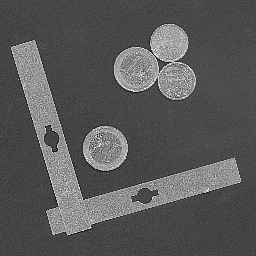

In [146]:
filename2 = "monedas2.pgm"
path_input = os.path.join(folder_path, filename2)
test_image2 = Image.open(path_input)
im2 = np.array(test_image2.convert('L'))
im2

In [148]:
from skimage.draw import polygon

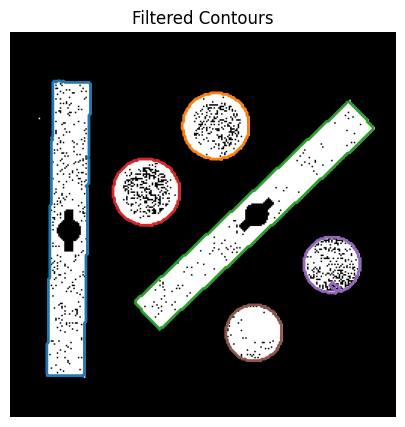

In [149]:
# Фильтрация контуров по количеству пикселей
filtered_contours = []
for contour in contours:
    rr, cc = polygon(contour[:, 0], contour[:, 1], image_gray.shape)
    if len(rr) > 900:
        filtered_contours.append(contour)
# Постобработка: Например, визуализация отфильтрованных контуров
plt.figure(figsize=(10, 5))
plt.imshow(binary_image, cmap='gray')  # Показать бинаризованное изображение для контекста
for contour in filtered_contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.title('Filtered Contours')
plt.axis('off')
plt.show()

### Var 1 - Test No Res

In [150]:
from sklearn.cluster import KMeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-151-a7c92a8d1862>:9: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)


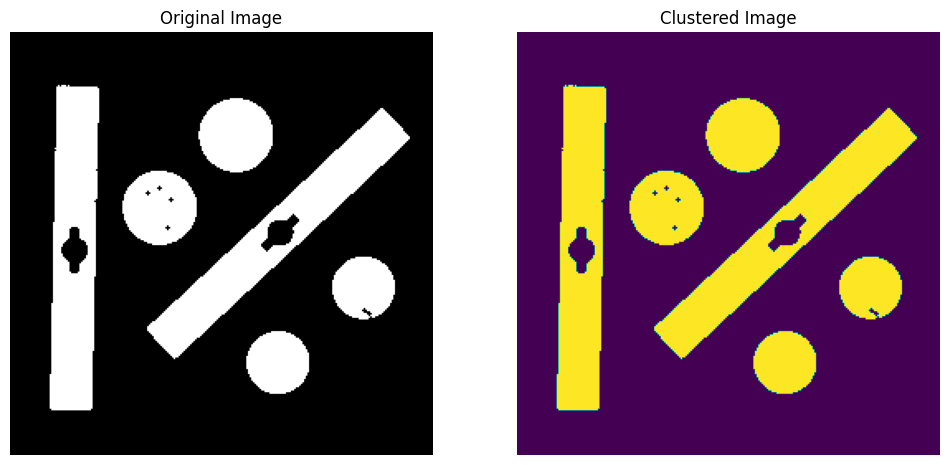

In [151]:


# Преобразуем изображение в двумерный массив
pixels = cleaned_image.reshape(-1, 1)
image_gray_np = cleaned_image

# color pixels = image_np.reshape(-1, 3)

# Применяем K-means для кластеризации пикселей
k = 3  # Количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0).fit(pixels)
clustered = kmeans.labels_

# Преобразуем метки кластеров обратно в формат изображения
clustered_image = clustered.reshape(image_gray_np.shape[0], image_gray_np.shape[1])
#clustered_image = clustered.reshape(image.shape[0]) #, image.shape[1])

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Original Image')
plt.imshow(cleaned_image, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.title('Clustered Image')
plt.imshow(clustered_image, cmap='viridis')  # использование цветовой карты для наглядности
plt.axis('off')

plt.show()

In [152]:
# Извлечение признаков (центроидов) для кластеризации
features = np.array([np.mean(contour, axis=0) for contour in contours])
features

array([[128.85376559,  38.50537634],
       [ 62.07735359, 136.19889503],
       [121.63563563, 161.91332263],
       [106.04420442,  90.07734807],
       [ 94.07692308,  90.07684615],
       [ 97.07692308,  83.07684615],
       [101.07692308,  97.07684615],
       [121.10526316, 163.11577895],
       [118.07692308,  95.07684615],
       [131.6741573 ,  38.61796629],
       [156.50283051, 213.83050847],
       [199.64706536, 161.64705882]])

### Var 2 - Test Not Bad but must add featurs

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


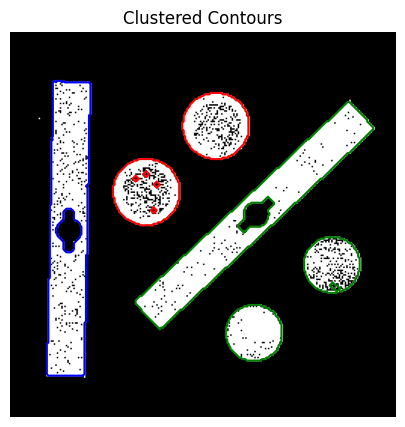

In [153]:
# Кластеризация контуров
k = 3  # Предполагаемое количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0).fit(features)
labels = kmeans.labels_

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.imshow(binary_image, cmap='gray')  # Показать бинаризованное изображение для контекста

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Цвета для различных кластеров

for contour, label in zip(contours, labels):
    plt.plot(contour[:, 1], contour[:, 0], colors[label % len(colors)])  # Цвета по модулю количества доступных цветов

plt.title('Clustered Contours')
plt.axis('off')
plt.show()

### Var 3 - Test Var2.1 add numder of pix in shape

In [154]:
from skimage.draw import polygon

In [155]:
# Шаг 1: Нахождение пикселей внутри каждого контура и фильтрация по количеству пикселей
filtered_contours = []
pixel_counts = []
for contour in contours:
    # Получение пикселей внутри контура
    rr, cc = polygon(contour[:, 0], contour[:, 1], image_gray.shape)
    if len(rr) > 300:  # Фильтрация контуров с количеством пикселей больше 100
        pixel_counts.append(len(rr))  # Сохранение количества пикселей внутри контура
        filtered_contours.append(contour)  # Сохранение контура, который проходит фильтрацию

pixel_counts

[5036, 1585, 5043, 1595, 1124, 1148]

In [156]:
# Шаг 3: Кластеризация на основе количества пикселей
k = 3  # Количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.array(pixel_counts).reshape(-1, 1))
labels = kmeans.labels_
labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 2, 1, 2, 0, 0], dtype=int32)

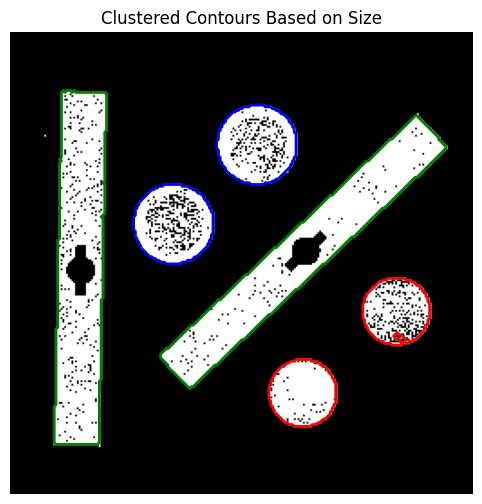

In [157]:
# Визуализация результатов кластеризации
plt.figure(figsize=(12, 6))
plt.imshow(binary_image, cmap='gray')
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']  # Разные цвета для разных кластеров
for contour, label in zip(filtered_contours, labels):
    plt.plot(contour[:, 1], contour[:, 0], color=colors[label % len(colors)], linewidth=2)
plt.title('Clustered Contours Based on Size')
plt.axis('off')
plt.show()

### Test filter vol of pix

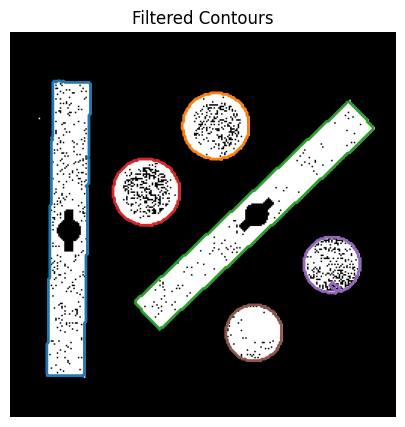

In [158]:
# Фильтрация контуров по количеству пикселей
filtered_contours = []
for contour in contours:
    rr, cc = polygon(contour[:, 0], contour[:, 1], image_gray.shape)
    if len(rr) > 900:
        filtered_contours.append(contour)
# Постобработка: Например, визуализация отфильтрованных контуров
plt.figure(figsize=(10, 5))
plt.imshow(binary_image, cmap='gray')  # Показать бинаризованное изображение для контекста
for contour in filtered_contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

plt.title('Filtered Contours')
plt.axis('off')
plt.show()

### Var 2 - Final segmentation of the coin images

In [159]:
### Var 2 - Test Not Bad but must add featurs shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


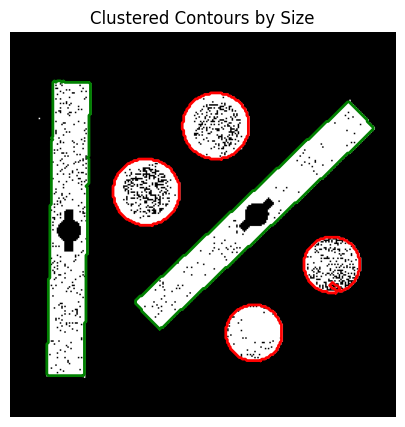

In [160]:
# Фильтрация контуров по количеству пикселей
filtered_contours = []
contour_sizes = []  # Список для хранения размеров контуров
for contour in contours:
    rr, cc = polygon(contour[:, 0], contour[:, 1], image_gray.shape)
    if len(rr) > 900:
        filtered_contours.append(contour)
        contour_sizes.append(len(rr))  # Сохраняем размер контура

# Кластеризация на основе количества пикселей в контурах
k = 2  # Количество кластеров
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.array(contour_sizes).reshape(-1, 1))
labels = kmeans.labels_

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.imshow(binary_image, cmap='gray')  # Показать бинаризованное изображение для контекста
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']  # Цвета для различных кластеров
for contour, label in zip(filtered_contours, labels):
    plt.plot(contour[:, 1], contour[:, 0], color=colors[label % len(colors)], linewidth=2)

plt.title('Clustered Contours by Size')
plt.axis('off')
plt.show()

### Var 2 MONEDAS1 - Final segmentation of the coin images

<ipython-input-161-9ebeb0995d36>:14: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  cleaned_image = filters.rank.mean(binary_image.astype(float), morphology.disk(1))
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


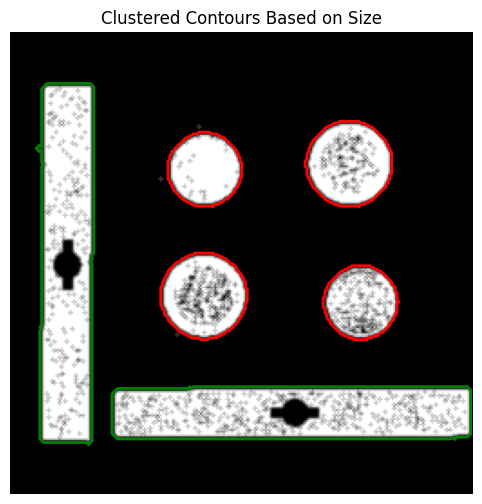

In [161]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from skimage.draw import polygon
from skimage import morphology

# Загрузка и предобработка изображения

image_gray = im1
thresh = filters.threshold_otsu(image_gray)
binary_image = image_gray > thresh
cleaned_image = filters.rank.mean(binary_image.astype(float), morphology.disk(1))
#cleaned_image = filters.rank.mean(binary_image.astype(int), disk(2))

# Нахождение и фильтрация контуров
contours = measure.find_contours(cleaned_image, level=0.999)
filtered_contours = []
pixel_counts = []
for contour in contours:
    rr, cc = polygon(contour[:, 0], contour[:, 1], image_gray.shape)
    if len(rr) > 300:  # Фильтрация контуров с количеством пикселей больше 300
        pixel_counts.append(len(rr))
        filtered_contours.append(contour)

# Кластеризация контуров по количеству пикселей
k = 2  # Определение количества кластеров
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.array(pixel_counts).reshape(-1, 1))
labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(12, 6))
plt.imshow(cleaned_image, cmap='gray')
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']  # Разные цвета для разных кластеров
for contour, label in zip(filtered_contours, labels):
    plt.plot(contour[:, 1], contour[:, 0], color=colors[label % len(colors)], linewidth=2)
plt.title('Clustered Contours Based on Size')
plt.axis('off')
plt.show()

### Var 2 MONEDAS2 - Final segmentation of the coin images

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


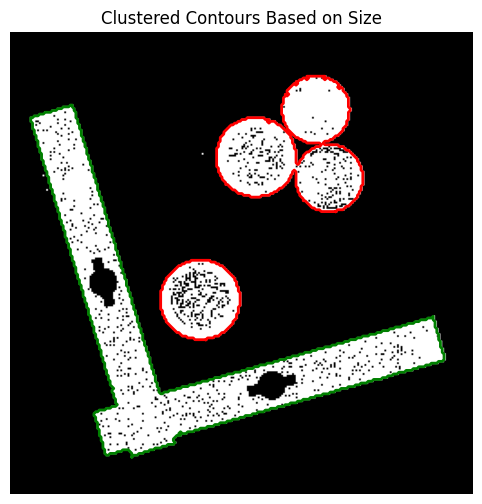

In [162]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from skimage.draw import polygon
from skimage import morphology

# Загрузка и предобработка изображения

image_gray = im2
thresh = filters.threshold_otsu(image_gray)
binary_image = image_gray > thresh
cleaned_image = binary_image
#cleaned_image = filters.rank.mean(binary_image.astype(float), morphology.disk(1))
#cleaned_image = filters.rank.mean(binary_image.astype(int), disk(2))

# Нахождение и фильтрация контуров
contours = measure.find_contours(cleaned_image, level=0.999)
filtered_contours = []
pixel_counts = []
for contour in contours:
    rr, cc = polygon(contour[:, 0], contour[:, 1], image_gray.shape)
    if len(rr) > 300:  # Фильтрация контуров с количеством пикселей больше 300
        pixel_counts.append(len(rr))
        filtered_contours.append(contour)

# Кластеризация контуров по количеству пикселей
k = 2  # Определение количества кластеров
kmeans = KMeans(n_clusters=k, random_state=0).fit(np.array(pixel_counts).reshape(-1, 1))
labels = kmeans.labels_

# Визуализация результатов кластеризации
plt.figure(figsize=(12, 6))
plt.imshow(cleaned_image, cmap='gray')
colors = ['r', 'g', 'b', 'y', 'm', 'c', 'k']  # Разные цвета для разных кластеров
for contour, label in zip(filtered_contours, labels):
    plt.plot(contour[:, 1], contour[:, 0], color=colors[label % len(colors)], linewidth=2)
plt.title('Clustered Contours Based on Size')
plt.axis('off')
plt.show()

## 2  Exercis Use the perimeter and area of the found regions

## Test 1

<ipython-input-163-774cce82d335>:22: RuntimeWarning: divide by zero encountered in scalar divide
  circularity = 4 * np.pi * (prop.area / (prop.perimeter * prop.perimeter))


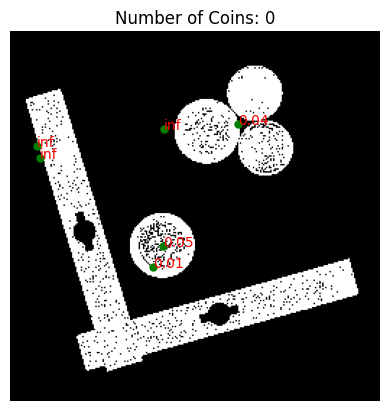

In [163]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology, io, color
from skimage.filters import threshold_otsu
from scipy import ndimage

#processed_image = morphology.opening(binary_image, morphology.disk(2))
processed_image = binary_image

# Лейблинг связных компонент
labels, num = measure.label(processed_image, return_num=True, connectivity=2)
properties = measure.regionprops(labels)

# Визуализация
fig, ax = plt.subplots()
ax.imshow(processed_image, cmap='gray')

# Переменные для подсчета монет
coin_count = 0

for prop in properties:
    circularity = 4 * np.pi * (prop.area / (prop.perimeter * prop.perimeter))
    if 0.7 <= circularity <= 1.1:  # Эмпирический диапазон для круглых объектов
        coin_count += 1
        color = 'lime'
    else:
        color = 'red'

    ax.plot(prop.centroid[1], prop.centroid[0], '.g', markersize=10)
    ax.text(prop.centroid[1], prop.centroid[0], f'{circularity:.2f}', color=color)

ax.set_title(f'Number of Coins: {coin_count}')
ax.axis('off')
plt.show()


## Test 2

<ipython-input-164-8714c9196b30>:27: RuntimeWarning: divide by zero encountered in scalar divide
  circularity = 4 * np.pi * (prop.area / (prop.perimeter * prop.perimeter))


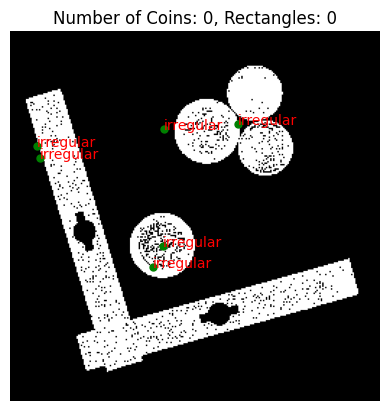

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, morphology, io, color
from skimage.filters import threshold_otsu
from scipy import ndimage

# Загрузка изображения

image_gray = im
thresh = threshold_otsu(image_gray)
binary_image = image_gray > thresh

# Лейблинг связных компонент
labels, num = measure.label(processed_image, return_num=True, connectivity=2)
properties = measure.regionprops(labels)

# Визуализация
fig, ax = plt.subplots()
ax.imshow(processed_image, cmap='gray')

# Переменные для подсчета монет и прямоугольников
coin_count = 0
rectangle_count = 0

for prop in properties:
    # Рассчитываем циркулярность для круглых объектов
    circularity = 4 * np.pi * (prop.area / (prop.perimeter * prop.perimeter))
    minr, minc, maxr, maxc = prop.bbox
    aspect_ratio = (maxc - minc) / (maxr - minr) if (maxr - minr) != 0 else 0

    if 0.7 <= circularity <= 1.1:  # Эмпирический диапазон для круглых объектов
        coin_count += 1
        color = 'lime'
        shape = 'circle'
    elif 1.2 < aspect_ratio < 1.8 or 0.55 < aspect_ratio < 0.85:  # Диапазон для прямоугольных объектов
        rectangle_count += 1
        color = 'blue'
        shape = 'rectangle'
    else:
        color = 'red'
        shape = 'irregular'

    ax.plot(prop.centroid[1], prop.centroid[0], '.g', markersize=10)
    ax.text(prop.centroid[1], prop.centroid[0], f'{shape}', color=color)

ax.set_title(f'Number of Coins: {coin_count}, Rectangles: {rectangle_count}')
ax.axis('off')
plt.show()


**skimage.measure.find_contours(array, level, fully_connected='low', positive_orientation='low')**
1. array (array_like): Входной 2D массив. Это должно быть 2D изображение, из которого вы хотите извлечь контуры.
2. level (float): Значение уровня, по которому извлекаются контуры. Контуры будут представлять точки изображения, имеющие это значение. Например, если вы используете результат работы функции threshold_otsu как уровень, то будет найдена граница между фоном и объектом.
3. fully_connected (str, по умолчанию 'low'): Указывает, какие "соседи" считаются соединенными. Две опции:
- 'low': Означает, что используется 4-связность для соединения пикселей.
- 'high': Означает, что используется 8-связность.
4. positive_orientation (str, по умолчанию 'low'): Управляет ориентацией возвращаемых контуров. Опции включают:
- 'low': Контурные точки ориентированы так, что более темные области находятся справа от контура (считается стандартным).
- 'high': Контурные точки ориентированы так, что более светлые области находятся справа от контура.

## Fimal solution

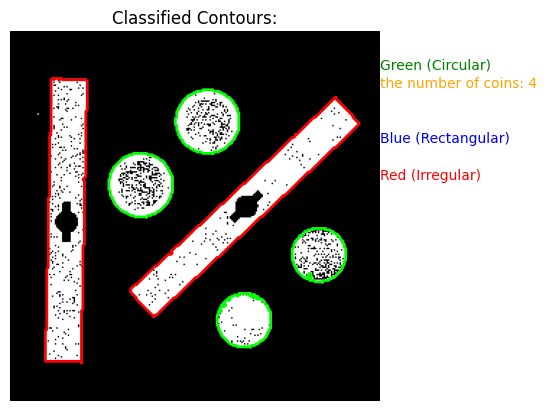

In [165]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, filters, measure
from skimage.measure import find_contours, regionprops
from skimage.draw import polygon

# Загрузка изображения
coin = 0
image_gray = im
thresh = threshold_otsu(image_gray)
binary_image = image_gray > thresh
#cleaned_image = filters.gaussian(binary_image, sigma=1)
cleaned_image = binary_image


# Нахождение контуров
contours = find_contours(cleaned_image, fully_connected='low', level=0.999) #skimage.measure.find_contours(array, level, fully_connected='low', positive_orientation='low')

# Подготовка к визуализации
fig, ax = plt.subplots()
ax.imshow(cleaned_image, cmap='gray')

# Анализ каждого контура
for contour in contours:
    # Создание маски для текущего контура
    mask = np.zeros_like(binary_image)
    rr, cc = polygon(contour[:, 0], contour[:, 1])
    mask[rr, cc] = 1

    # Проверка, содержит ли контур минимум 100 пикселей
    if np.sum(mask) >= 300:


      # Вычисляем свойства области
      props = regionprops(mask.astype(int))[0]
      area = props.area
      perimeter = props.perimeter
      minr, minc, maxr, maxc = props.bbox
      aspect_ratio = (maxc - minc) / (maxr - minr) if (maxr - minr) != 0 else 0

      # Вычисление циркулярности
      circularity = 4 * np.pi * (area / (perimeter * perimeter)) if perimeter != 0 else 0

      # Классификация формы контура
      if 0.7 <= circularity <= 1.1:
          shape_color = 'lime'  # Круглые контуры
          coin += 1
      elif 1.2 < aspect_ratio < 1.8 or 0.55 < aspect_ratio < 0.85:
          shape_color = 'blue'  # Прямоугольные контуры
      else:
         shape_color = 'red'  # Иные контуры

      # Рисование контура
      ax.plot(contour[:, 1], contour[:, 0], linewidth=2, color=shape_color)

ax.set_title('Classified Contours:', color='black')
#ax.text(1.5, 0.9, 'Green (Circular)', color='green', ha='center', va='top', transform=ax.transAxes)
#ax.text(0.9, 0.8, 'Blue (Rectangular)', color='blue', ha='center', va='top', transform=ax.transAxes)
#ax.text(0.9, 0.7, 'Red (Irregular)', color='red', ha='center', va='top', transform=ax.transAxes)

ax.text(1.0, 0.9, 'Green (Circular)', color='green', transform=ax.transAxes)
ax.text(1.0, 0.85, 'the number of coins: ' + str(coin), color='orange', transform=ax.transAxes)

ax.text(1.0, 0.7, 'Blue (Rectangular)', color='blue',transform=ax.transAxes)
ax.text(1.0, 0.6, 'Red (Irregular)', color='red',transform=ax.transAxes)

plt.axis('off')
plt.show()


In [166]:
# Получение размера изображения
height, width = im.shape

print("Ширина изображения:", width)
print("Высота изображения:", height)

Ширина изображения: 256
Высота изображения: 256


## 3  Exercis find which regions correspond to each coin type

In [167]:
import math

areas = []  # Список для площадей
diameters = []  # Список для диаметров

for contour in contours:
    # Создание маски для текущего контура
    mask = np.zeros_like(binary_image)
    rr, cc = polygon(contour[:, 0], contour[:, 1])
    mask[rr, cc] = 1

    # Проверка, содержит ли контур минимум 100 пикселей
    if np.sum(mask) >= 300:


      # Вычисляем свойства области
      props = regionprops(mask.astype(int))[0]
      area = props.area
      #print("Площадь области:", area)
      areas.append(area)

      diameter = math.sqrt((4 * area) / math.pi)
      #print("Диаметр круга:", diameter)
      diameters.append(diameter)


print(areas)
print(diameters)

[5039, 1586, 5041, 1595, 1134, 1139]
[80.09902662280288, 44.937266471715525, 80.11492086378139, 45.06458780298101, 37.99807421080277, 38.08175207961617]


## 4  Exercis segmentation of the coin images automatically the total amount

In [175]:
# Перевод размеров монет в пиксели
pixels_per_cm = 50 / 2.54  # пикселей на см
diameter_1_euro = 2.3 * pixels_per_cm  # диаметр 1 евро в пикселях
diameter_10_cents = 1.95 * pixels_per_cm  # диаметр 10 центов в пикселях
Tencents = 0
Oneeuro = 0

for diameter in diameters:
    if diameter_10_cents-5 <= diameter <= diameter_10_cents+5:
        Tencents += 1
    elif diameter_1_euro-5 <= diameter <= diameter_1_euro+5:
        Oneeuro += 1

print("1 Euro pcs", Oneeuro)
print("10 Cents pcs", Tencents)
print("Totl euro:", 1*Oneeuro+0.1*Tencents, "EUR")
#print(diameter_1_euro)
#print(diameter_10_cents)


1 Euro pcs 2
10 Cents pcs 2
Totl euro: 2.2 EUR


For such a task, it is faster to find clusters of pixels equal in area to coins, locate the centroids of the filtered clusters, and, if necessary, check them for circularity.

## 5  Exercis Develop your  own implementation Otsu’s method, connected-components labelling algorithm

#### Def otsu threshold

In [176]:
import numpy as np
import matplotlib.pyplot as plt

def otsu_threshold(hist, total):
    current_max = 0.0
    threshold = 0
    sum_total = 0
    sum_foreground = 0
    weight_background = 0
    weight_foreground = 0

    for i in range(256):
        sum_total += i * hist[i]

    for i in range(256):
        weight_background += hist[i]
        if weight_background == 0:
            continue

        weight_foreground = total - weight_background
        if weight_foreground == 0:
            break

        sum_foreground += i * hist[i]

        mean_background = sum_foreground / weight_background
        mean_foreground = (sum_total - sum_foreground) / weight_foreground

        var_between = weight_background * weight_foreground
        var_between *= (mean_background - mean_foreground) ** 2

        if var_between > current_max:
            current_max = var_between
            threshold = i

    return threshold

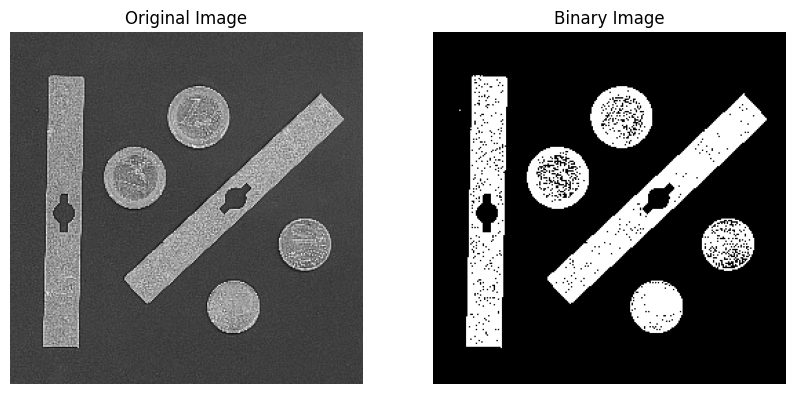

In [177]:
# Пример использования метода Оцу
image = im
if image.ndim == 3:
    image = image[:,:,0]  # Преобразование в градации серого, если необходимо
hist = np.histogram(image, bins=np.arange(257))[0]
threshold = otsu_threshold(hist, image.size)
binary_image = image > threshold

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')
plt.show()

#### Def label components

In [178]:
def label_connected_components(binary_image):
    labeled = np.zeros_like(binary_image, dtype=int)
    #labeled: Массив, который будет хранить метки для каждого пикселя
    label = 1
    #label: Начальное значение метки, которое будет присваиваться компонентам.
    equivalence = {}
    #equivalence: Словарь для отслеживания эквивалентности меток.
    #Это необходимо для объединения регионов, которые в процессе сканирования оказываются связанными.


    # Первый проход
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 0:
                continue

            #Для каждого пикселя проверяются его соседи (сверху и слева) для определения, является ли этот пиксель частью уже идентифицированного региона.
            neighbors = []
            if i > 0 and labeled[i-1, j] > 0:
                neighbors.append(labeled[i-1, j])
            if j > 0 and labeled[i, j-1] > 0:
                neighbors.append(labeled[i, j-1])

            #Если у пикселя нет маркированных соседей, ему присваивается новая уникальная метка.
            if not neighbors:
                labeled[i, j] = label
                equivalence[label] = label
                label += 1
            #Если соседи есть, пиксель получает минимальную метку из соседей.
            #Также обновляется таблица эквивалентности, чтобы отразить, что все соседние метки теперь эквивалентны минимальной найденной метке.
            else:
                min_label = min(neighbors)
                labeled[i, j] = min_label
                for n in neighbors:
                    equivalence[n] = min(equivalence[n], min_label)

    # Второй проход (коррекция меток)
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            #Второй проход по массиву для коррекции меток. Для каждого пикселя с меткой, эта метка корректируется для обеспечения связности компонентов.
            if labeled[i, j] > 0:
                #Используется метод "find" из структуры данных "union-find"
                #для определения "корневой" метки каждого пикселя (т.е., находится главная метка для группы эквивалентных меток).
                root = labeled[i, j]
                while equivalence[root] != root:
                    root = equivalence[root]
                labeled[i, j] = root

    return labeled



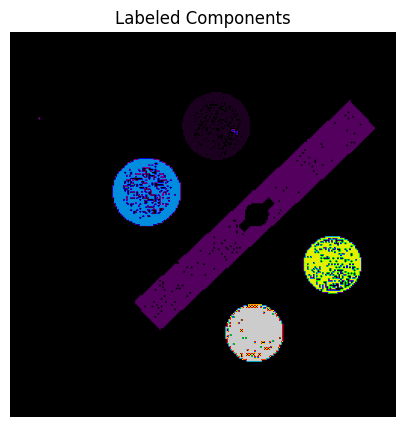

In [179]:
# Пример использования алгоритма маркировки
labeled_image = label_connected_components(binary_image)

plt.figure(figsize=(10, 5))
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Components')
plt.axis('off')
plt.show()


### Def label components More accurately

 - Окрестность k×k: Каждый пиксель проверяется на связность с пикселями, находящимися в пределах окрестности k×k. Это значительно увеличивает шансы объединения близко расположенных регионов
 - Таблица Эквивалентности: Используется для отслеживания и объединения эквивалентных меток, что позволяет устранить несогласованности между связными компонентами.
 - Коррекция Меток: Во время второго прохода для каждого пикселя устанавливается окончательная метка, представляющая собой корневую метку его группы.

In [184]:
def label_connected_components(binary_image, k):
    labeled = np.zeros_like(binary_image, dtype=int)
    label = 1
    equivalence = {}

    # Первый проход: Инициализация меток и таблицы эквивалентности
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if binary_image[i, j] == 0:
                continue

            # Поиск соседей в пределах окрестности kxk
            neighbors = set()
            for di in range(-k, k+1):
                for dj in range(-k, k+1):
                    ni, nj = i + di, j + dj
                    if 0 <= ni < binary_image.shape[0] and 0 <= nj < binary_image.shape[1]:
                        if labeled[ni, nj] > 0:
                            neighbors.add(labeled[ni, nj])

            if not neighbors:
                labeled[i, j] = label
                equivalence[label] = label
                label += 1
            else:
                min_label = min(neighbors)
                labeled[i, j] = min_label
                for n in neighbors:
                    if n in equivalence:
                        equivalence[n] = min(equivalence[n], min_label)

    # Второй проход: Коррекция меток с использованием таблицы эквивалентности
    for i in range(binary_image.shape[0]):
        for j in range(binary_image.shape[1]):
            if labeled[i, j] > 0:
                root = labeled[i, j]
                # Нахождение корневой метки для текущей метки
                while equivalence[root] != root:
                    root = equivalence[root]
                labeled[i, j] = root

    return labeled


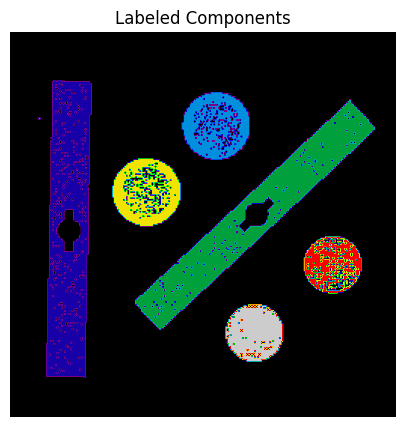

In [189]:
# Пример использования алгоритма маркировки
labeled_image = label_connected_components(binary_image, 5)

plt.figure(figsize=(10, 5))
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Components')
plt.axis('off')
plt.show()

## 6  Exercis Try the multi-Otsu thresholding

### Code from scikit-image

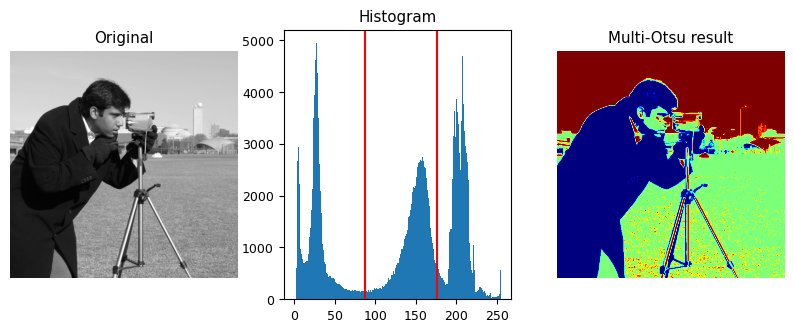

In [190]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = data.camera()

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='jet')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

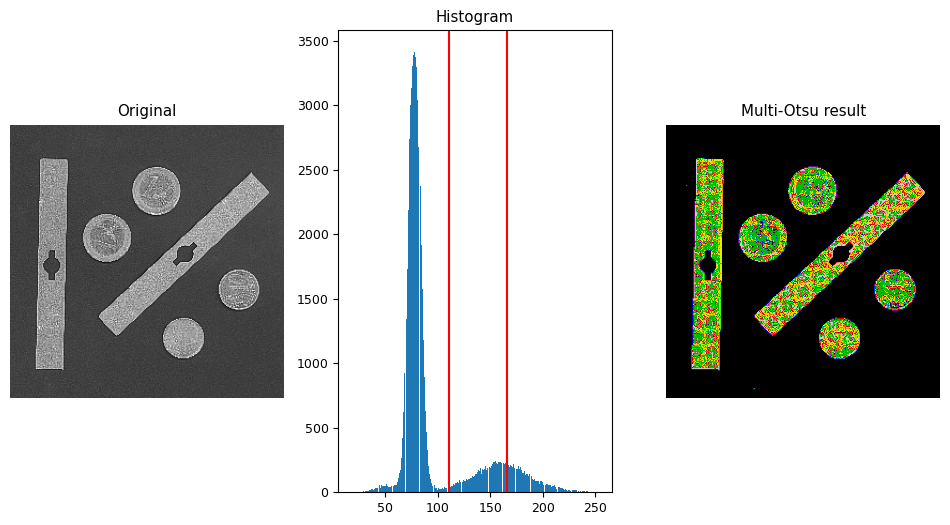

In [193]:
# Setting the font size for all plots.
matplotlib.rcParams['font.size'] = 9

# The input image.
image = im

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='nipy_spectral')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

## 7 Exercis other segmentation methods

### Entropy-based method

- Идея: Выбрать порог, максимизирующий энтропию фона и объектов, что позволяет лучше различать разнообразные текстуры.
- Применение: Эффективен для изображений с сложной текстурой, где простое разделение по интенсивности неэффективно.

-  Метод Капура (Максимальная Энтропия)

 -- Идея Метода
Метод Капура заключается в выборе такого порога \( t \), который максимизирует сумму энтропий для переднего и заднего планов изображения, рассчитываемых на основе вероятностей уровней серого в каждом сегменте.

 ---  Математическая Формулировка
Для каждого возможного порога \( t \), гистограмма уровней серого разделяется на две части, и энтропии для каждой части рассчитываются следующим образом:

- \( P(f) \) и \( P(b) \) — вероятности пикселей для переднего и заднего планов.
- Энтропии рассчитываются как:

"$
  H(f) = -\sum_{i=0}^{t} P(f_i) \log(P(f_i))
"$
  
"$
  H(b) = -\sum_{i=t+1}^{L-1} P(b_i) \log(P(b_i))
$"

  где \( L \) — количество уровней серого,
  
  "$P(f_i)$" и \"$( P(b_i) )$" — нормализованные гистограммы для каждого сегмента.

Цель состоит в том, чтобы найти такое \( t \), которое максимизирует "$( H(f) + H(b))$".

H(f)=−∑
i=0
t
​
 P(f
i
​
 )log(P(f
i
​
 ))

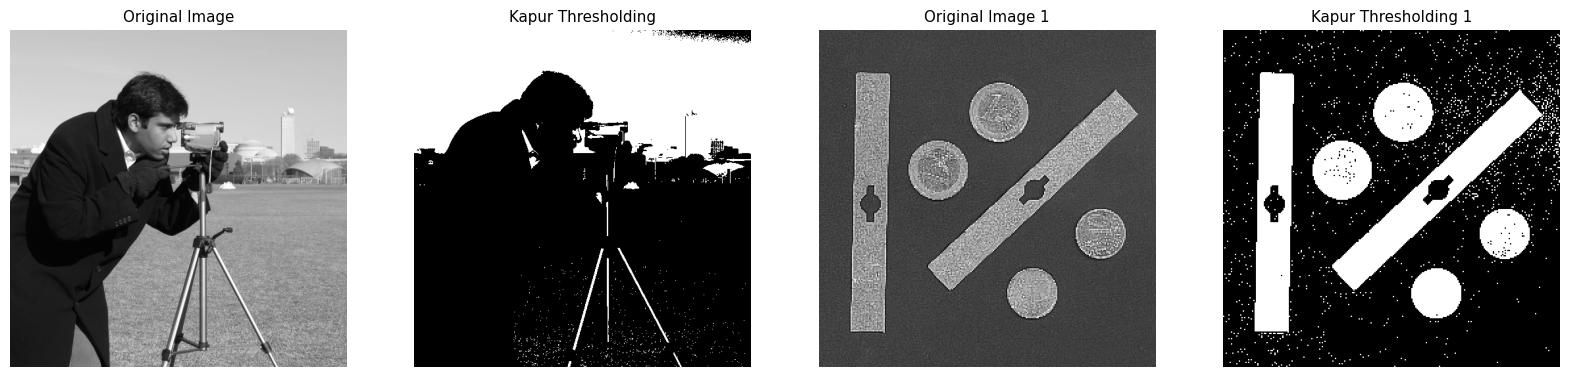

In [212]:
from skimage import io, color
import numpy as np
import matplotlib.pyplot as plt

def kapur_threshold(image):
    hist, bins = np.histogram(image.flatten(), 256, [0,256])
    if hist.sum() == 0:
        return 0
    # Нормализация гистограммы
    hist = hist.astype(float) / hist.sum()
    # Кумулятивные суммы вероятностей для классов
    cumsum = hist.cumsum()

    # Функции для расчета энтропии
    def entropy(cumsum):
        epsilon = np.finfo(float).eps
        return -((cumsum * np.log2(cumsum + epsilon)).cumsum())

    # Энтропии для всех возможных порогов
    H_f = entropy(cumsum)
    H_b = entropy(1 - cumsum)

    # Максимальная энтропия
    max_ent = H_f + H_b[::-1]
    optimal_threshold = np.argmax(max_ent)

    return optimal_threshold

# Загрузка и предобработка изображения
image = data.camera()
if image.ndim == 3:
    image = color.rgb2gray(image)

image1 = im
if image1.ndim == 3:
    image1 = color.rgb2gray(image1)


# Применение метода Капура
threshold = kapur_threshold(image)
binary_image = image > threshold

threshold1 = kapur_threshold(image1)
binary_image1 = image1 > threshold1



# Отображение результатов
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_image, cmap='gray')
ax[1].set_title('Kapur Thresholding')
ax[1].axis('off')

ax[2].imshow(image1, cmap='gray')
ax[2].set_title('Original Image 1')
ax[2].axis('off')

ax[3].imshow(binary_image1, cmap='gray')
ax[3].set_title('Kapur Thresholding 1')
ax[3].axis('off')

plt.show()

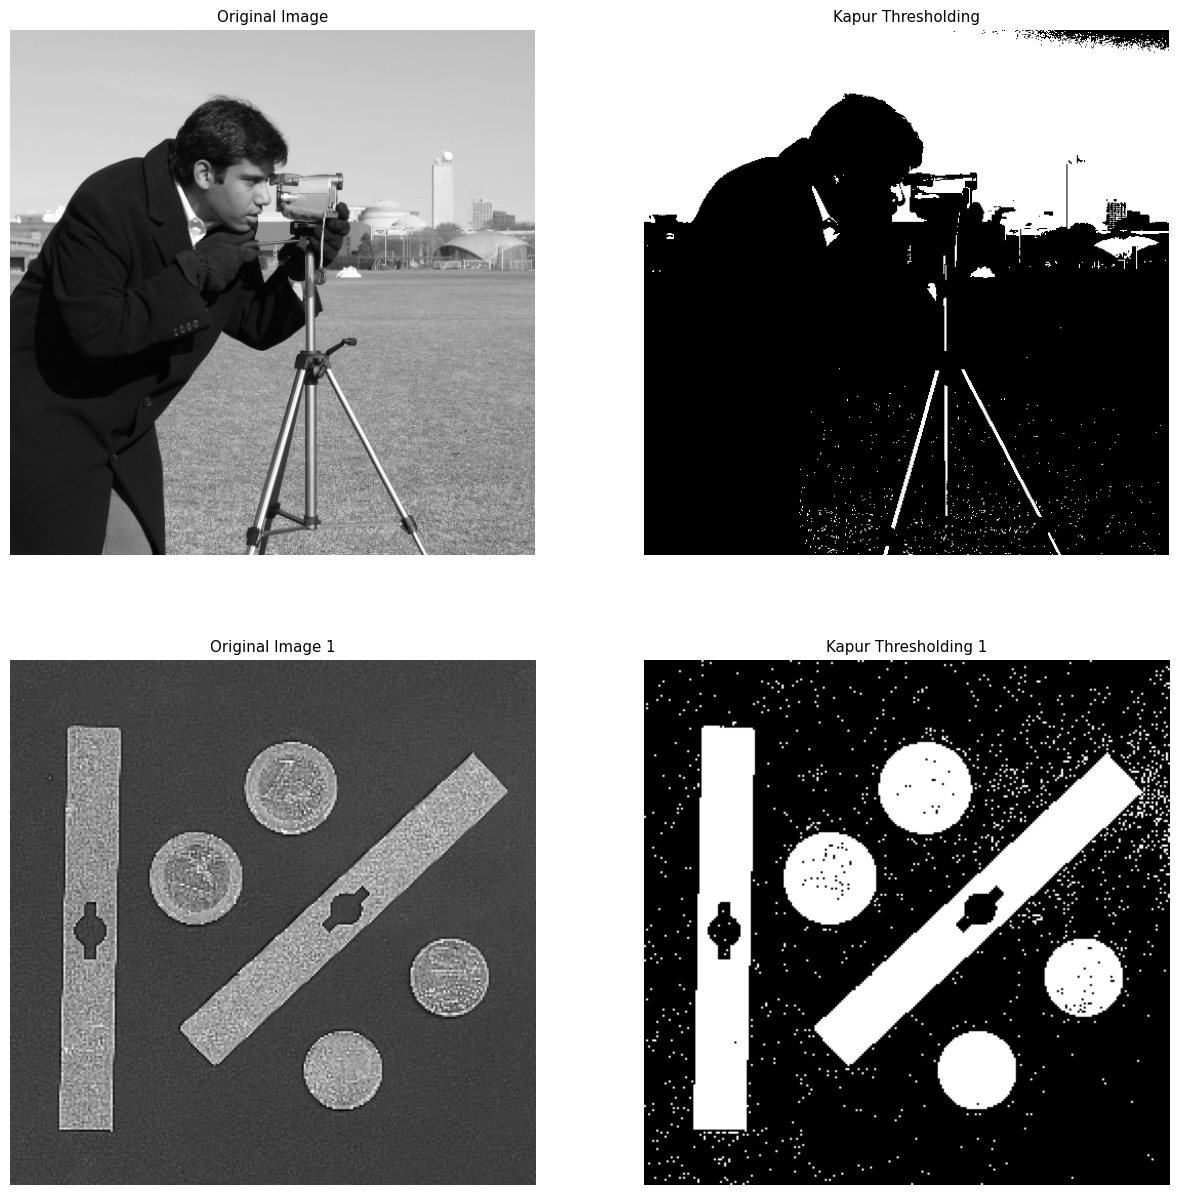

In [213]:
# Отображение результатов
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original Image')
ax[0, 0].axis('off')

ax[0, 1].imshow(binary_image, cmap='gray')
ax[0, 1].set_title('Kapur Thresholding')
ax[0, 1].axis('off')

ax[1, 0].imshow(image1, cmap='gray')
ax[1, 0].set_title('Original Image 1')
ax[1, 0].axis('off')

ax[1, 1].imshow(binary_image1, cmap='gray')
ax[1, 1].set_title('Kapur Thresholding 1')
ax[1, 1].axis('off')

plt.show()

### Triangle

-- Идея: Автоматически выбирает порог на основе гистограммы, которая представляет собой треугольник, максимизируя расстояние от линии, соединяющей максимальную интенсивность с минимальной, до гистограммы.
-- Применение: Хорошо работает для изображений с ярко выраженным пиком фона или объектов.

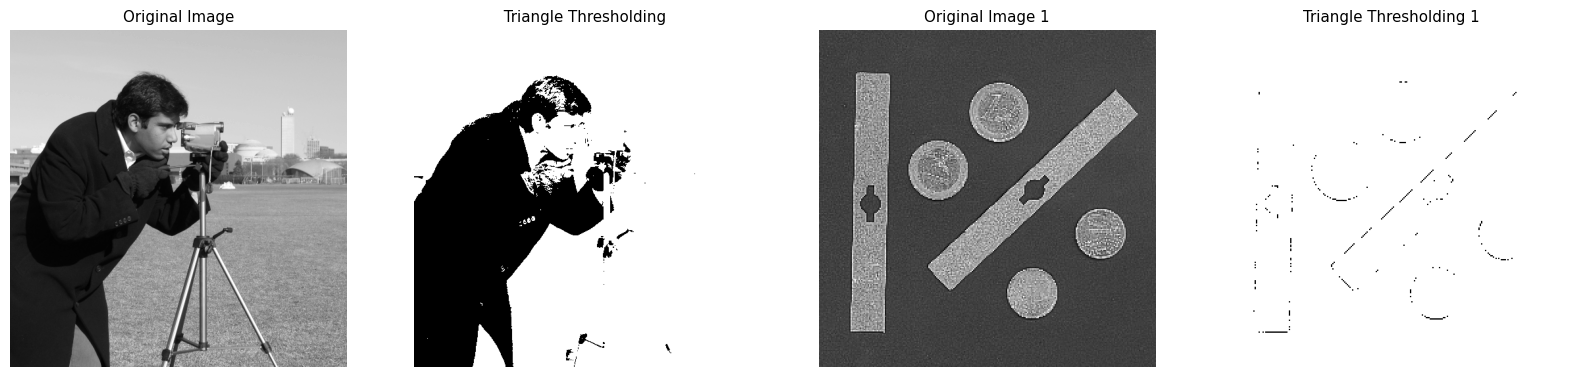

In [217]:
from skimage import filters, io, color



# Применение метода Triangle
thresh_triangle = filters.threshold_triangle(image)
binary_triangle = image > thresh_triangle

# Загрузка и предобработка изображения
image = data.camera()
if image.ndim == 3:
    image = color.rgb2gray(image)

image1 = im
if image1.ndim == 3:
    image1 = color.rgb2gray(image1)


# Применение метода Triangle
thresh_triangle = filters.threshold_triangle(image)
binary_triangle = image > thresh_triangle


thresh_triangle1 = filters.threshold_triangle(image1, nbins=100)
binary_triangle1 = image1 > thresh_triangle



# Отображение результатов
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original Image')
ax[0].axis('off')

ax[1].imshow(binary_triangle, cmap='gray')
ax[1].set_title(' Triangle Thresholding')
ax[1].axis('off')

ax[2].imshow(image1, cmap='gray')
ax[2].set_title('Original Image 1')
ax[2].axis('off')

ax[3].imshow(binary_triangle1, cmap='gray')
ax[3].set_title('Triangle Thresholding 1')
ax[3].axis('off')

plt.show()

## 8 Exercis SLIC

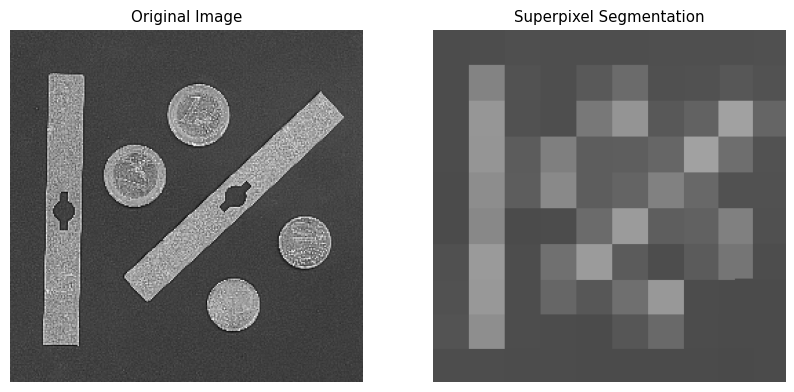

In [223]:
from skimage import io
from skimage.segmentation import slic
from skimage.color import label2rgb
import matplotlib.pyplot as plt

# Загрузка изображения
image = im
if image.ndim == 3:
    image = image[..., :3]  # Убедимся, что изображение в RGB

# Применение SLIC
segments = slic(image, n_segments=100, compactness=5, sigma=3, multichannel = False)
#n_segments (int, по умолчанию 100):
#Желаемое количество суперпикселей. Увеличение этого числа приведет к уменьшению размера каждого суперпикселя.

# compactness (float, по умолчанию 10.0): Баланс между цветовым пространством и пространственным пространством.
#Большее значение делает суперпиксель более квадратным/кубическим.
#В контексте SLIC, это параметр, который регулирует, насколько "компактными" должны быть суперпиксели.
#Меньшее значение приводит к суперпикселям, которые могут принимать более неформальные и растянутые формы по изображению.

#max_iter (int, по умолчанию 10): Максимальное количество итераций алгоритма SLIC. Алгоритм может сойтись и раньше.

#multichannel (bool, по умолчанию True): Указывает, является ли входное изображение многоканальным (например, RGB). Установите False для работы с 2D градациями серого.

#convert2lab (bool, по умолчанию None): Указывает, следует ли преобразовывать цвета изображения из RGB в LAB
#перед выполнением алгоритма. Пространство LAB лучше моделирует восприятие человеческим глазом и
#может улучшить результаты сегментации на цветных изображениях.

#enforce_connectivity (bool, по умолчанию True): Указывает, следует ли в конце процесса внедрить пост-обработку для обеспечения
#того, чтобы каждый суперпиксель был связным. Это устраняет изолированные сегменты в суперпикселях.

#slic_zero (bool, по умолчанию False): Включает вариант SLIC Zero, алгоритм в котором только цветовые расстояния
#используются для кластеризации. Это может быть полезно в случаях, когда пространственное соотношение считается менее важным.

# Визуализация суперпикселей
segmented_image = label2rgb(segments, image, kind='avg')

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(segmented_image)
plt.title('Superpixel Segmentation')
plt.axis('off')

plt.show()


In [228]:
import numpy as np

# Вычисление среднего цвета для каждого суперпикселя
unique_segments = np.unique(segments)
features = np.array([image[segments == seg].mean(axis=0) for seg in unique_segments])
features = features.reshape(-1, 1)


In [229]:
from sklearn.cluster import KMeans

# Кластеризация суперпикселей
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

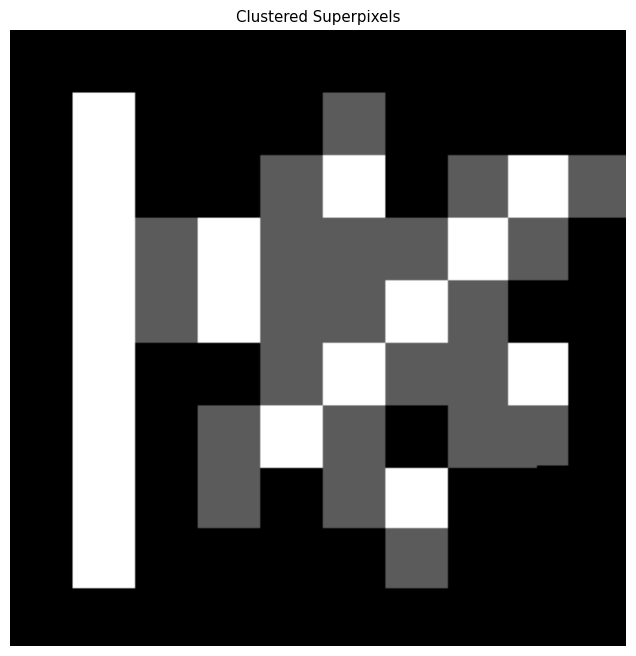

In [230]:
# Создание изображения с кластеризованными суперпикселями
clustered_image = np.zeros_like(image)
for seg_id, cluster_id in zip(unique_segments, kmeans.labels_):
    clustered_image[segments == seg_id] = kmeans.cluster_centers_[cluster_id]

plt.figure(figsize=(8, 8))
plt.imshow(clustered_image)
plt.title('Clustered Superpixels')
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


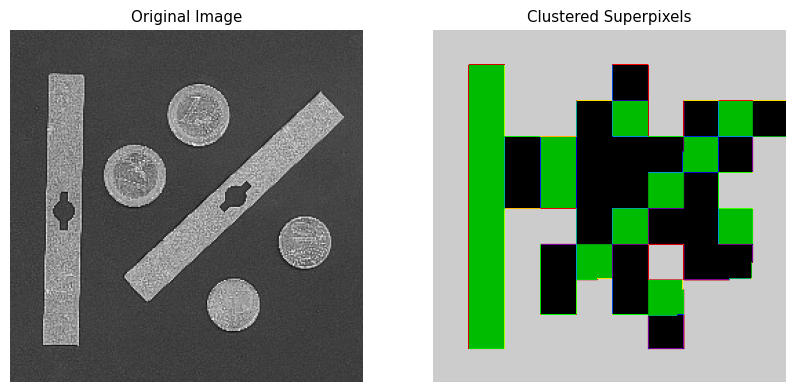

In [239]:
from skimage import io, segmentation, color
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

# Загрузка изображения
image = im
if image.ndim == 3:
    image = color.rgb2gray(image)  # Преобразование в градации серого для упрощения

# Генерация суперпикселей с помощью SLIC
segments = segmentation.slic(image, n_segments=100, compactness=2, sigma=3, start_label=1)

# Вычисление среднего значения интенсивности для каждого суперпикселя
unique_segments = np.unique(segments)
features = np.array([image[segments == seg].mean() for seg in unique_segments])

# Решейпинг features для соответствия ожиданиям KMeans
features = features.reshape(-1, 1)  # Добавление второго измерения

# Кластеризация суперпикселей
kmeans = KMeans(n_clusters=3, random_state=0).fit(features)
labels = kmeans.labels_

# Создание изображения для визуализации кластеризованных суперпикселей
output_image = np.zeros_like(image)
for seg_id, label in zip(unique_segments, labels):
    output_image[segments == seg_id] = label

# Визуализация
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(output_image, cmap='nipy_spectral')
plt.title('Clustered Superpixels')
plt.axis('off')
plt.show()
